In [15]:
# # Training - Testing splite shape
# df_train = pd.read_csv("/content/mitbih.csv", header=None)
# df_train.shape
# df_test = df_train.iloc[87554:,:]
# df_train = df_train.iloc[:87554,:]
# df_test.shape, df_train.shape

((21893, 188), (87554, 188))

In [18]:
import pandas as pd
import numpy as np

from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, GlobalMaxPool1D, GlobalAveragePooling1D, \
    concatenate, BatchNormalization
from sklearn.metrics import f1_score, accuracy_score

# Training - Testing splite
df_train = pd.read_csv("/content/heartbeat/mitbih_train.csv", header=None)
df_train = df_train.sample(frac=1)
df_test = pd.read_csv("/content/heartbeat/mitbih_test.csv", header=None)


# Training inputes and target
Y = np.array(df_train[187].values).astype(np.int8)
X = np.array(df_train[list(range(187))].values)[..., np.newaxis]

# Testing inputes and target
Y_test = np.array(df_test[187].values).astype(np.int8)
X_test = np.array(df_test[list(range(187))].values)[..., np.newaxis]

# Model architecture
def get_model():
    nclass = 5
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(256, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = BatchNormalization()(img_1)
    img_1 = Convolution1D(256, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(512, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = Convolution1D(512, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(512, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = Convolution1D(512, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(256, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = BatchNormalization()(dense_1)
    dense_1 = Dropout(rate=0.5)(dense_1)
    dense_1 = Dense(128, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.softmax, name="dense_3_mitbih")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
    model.summary()
    return model

# Load Model
model = get_model()

# Saving model checkpoints
file_path = "ecg_classification_model.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)

# early stopping 
callbacks_list = [checkpoint, early, redonplat]  

# Model training
model.fit(X, Y, epochs=100, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model.load_weights(file_path)

pred_test = model.predict(X_test)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(Y_test, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 183, 256)          1536      
_________________________________________________________________
batch_normalization_18 (Batc (None, 183, 256)          1024      
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 179, 256)          327936    
_________________________________________________________________
batch_normalization_19 (Batc (None, 179, 256)          1024      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 89, 256)           0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 89, 256)           0   

# Kera

In [1]:
# import torch
# import torchvision
import sklearn
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import torch.nn.functional as F
from sklearn.utils import resample
from sklearn.metrics import f1_score, accuracy_score
import tensorflow as tf
from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.layers import Dense, Input, Convolution1D, Dropout, MaxPool1D, GlobalAveragePooling1D, GlobalMaxPool1D, concatenate
# from torch.utils.data import DataLoader, TensorDataset, random_split

In [2]:
!pip install opendatasets --upgrade --quiet

In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/shayanfazeli/heartbeat")

  5%|▌         | 5.00M/98.8M [00:00<00:03, 26.8MB/s]

100%|██████████| 98.8M/98.8M [00:01<00:00, 71.1MB/s]


In [13]:
train_path = "/content/heartbeat/mitbih_train.csv"
test_path  = "/content/heartbeat/mitbih_test.csv"
train_df = pd.read_csv(train_path, header=None).sample(frac=1).reset_index(drop=True)
test_df  = pd.read_csv(test_path , header=None).sample(frac=1).reset_index(drop=True)

In [14]:
pd.concat([train_df,test_df]).to_csv("mitbih.csv",index=False)

In [7]:
train_df.shape, test_df.shape, pd.concat([train_df,test_df]).

((87554, 188), (21892, 188), (109446, 188))

In [84]:
train_df[187] = train_df[187].astype(int)
equilibre = train_df[187].value_counts()
print(equilibre)

0    90589
4     8039
2     7236
1     2779
3      803
Name: 187, dtype: int64


In [28]:
class_weight = {0: 0.01,
                4: 0.1,
                2: 0.11,
                1: 0.2,
                3: 0.58}

In [26]:
# Balancing Out the Samples ratio
df_0 = train_df[ train_df[187]==0 ].sample(n=10000, random_state=42)
df_1 = train_df[ train_df[187]==1 ]
df_2 = train_df[ train_df[187]==2 ]
df_3 = train_df[ train_df[187]==3 ]
df_4 = train_df[ train_df[187]==4 ]

df_1_upsample = resample(df_1, n_samples=10000, replace=True, random_state=123)
df_2_upsample = resample(df_2, n_samples=10000, replace=True, random_state=123)
df_3_upsample = resample(df_3, n_samples=10000, replace=True, random_state=123)
df_4_upsample = resample(df_4, n_samples=10000, replace=True, random_state=123)

train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])


In [27]:
equilibre = train_df[187].value_counts()
print(equilibre)

4    10000
3    10000
2    10000
1    10000
0    10000
Name: 187, dtype: int64


In [13]:
train_df.shape

(3205, 188)

In [86]:
Y = np.array( train_df[187].values ).astype(np.int8)
X = np.array( train_df[ list(range(187)) ].values)[..., np.newaxis]

Y_test = np.array( test_df[187].values ).astype(np.int8)
X_test = np.array( test_df[ list(range(187)) ].values ).astype(np.int8)[..., np.newaxis]

In [87]:
np.unique(Y_test, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int8),
 array([18118,   556,  1448,   162,  1608]))

In [10]:
X_test.shape

(21892, 187, 1)

In [92]:

def get_model():
    nclass = 5
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=3, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.5)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.5)(img_1)
    img_1 = Convolution1D(32, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.5)(img_1)
    img_1 = Convolution1D(256, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.5)(img_1)

    dense_1 = Dense(512, activation=activations.relu, name="dense_1")(img_1)
    dense_1   = Dropout(rate=0.5)(dense_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1   = Dropout(rate=0.5)(dense_1)
    dense_1 = Dense(512, activation=activations.relu, name="dense_3")(dense_1)
    dense_1   = Dropout(rate=0.5)(dense_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_4")(dense_1)
    dense_1   = Dropout(rate=0.5)(dense_1)
    dense_1 = Dense(nclass, activation=activations.softmax, name="dense_5_mitbih")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.0001)

    model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
    model.summary()
    return model

model = get_model()
file_path = "ecg.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early



Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 185, 16)           64        
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 183, 16)           784       
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 91, 16)            0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 91, 16)            0         
_________________________________________________________________
conv1d_58 (Conv1D)           (None, 89, 32)            1568      
_________________________________________________________________
conv1d_59 (Conv1D)           (None, 87, 32)            3104

In [18]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0



In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [30]:
# For training on GPUs
import tensorflow as tf
from tensorflow.python.keras import backend as K

# adjust values to your needs
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} )
sess = tf.compat.v1.Session(config=config) 
K.set_session(sess)

In [93]:
model.fit(X, Y, epochs=100, verbose=2, callbacks=callbacks_list, validation_data=(X_test,Y_test))
model.load_weights(file_path)



Epoch 1/100
3421/3421 - 27s - loss: 0.6633 - acc: 0.8261 - val_loss: 0.9469 - val_acc: 0.8276

Epoch 00001: val_acc improved from -inf to 0.82761, saving model to ecg.h5
Epoch 2/100
3421/3421 - 25s - loss: 0.5249 - acc: 0.8300 - val_loss: 0.9576 - val_acc: 0.4289

Epoch 00002: val_acc did not improve from 0.82761
Epoch 3/100
3421/3421 - 25s - loss: 0.4818 - acc: 0.8430 - val_loss: 1.1239 - val_acc: 0.4290

Epoch 00003: val_acc did not improve from 0.82761
Epoch 4/100
3421/3421 - 25s - loss: 0.4528 - acc: 0.8642 - val_loss: 1.0638 - val_acc: 0.4515

Epoch 00004: val_acc did not improve from 0.82761

Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoch 5/100
3421/3421 - 25s - loss: 0.4307 - acc: 0.8746 - val_loss: 0.9162 - val_acc: 0.8271

Epoch 00005: val_acc did not improve from 0.82761
Epoch 6/100
3421/3421 - 25s - loss: 0.4263 - acc: 0.8758 - val_loss: 0.9102 - val_acc: 0.8271

Epoch 00006: val_acc did not improve from 0.82761
Epoch 00006: early stopp

In [25]:
pred_test = model.predict(X)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(Y, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.18114919543821278 
Test accuracy score : 0.8277291728533248 


# Noraml vs Abnormal autoencoders mlp


In [ ]:
# Imports
import torch
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split

In [ ]:
# Hyperparameters
batch_size=64


# Other constants
DATA_FILENAME_nor = "Features.csv"
DATA_FILENAME_ab  = "Features_ab.csv"
TARGET_COLUMN = 'class'
output_size=1

In [ ]:
# Read csv abnormal
dataframe_ab = pd.read_csv(DATA_FILENAME_ab)
dataframe_ab.head()

,a1_mean,a1_var,a1_std,a2_mean,a2_var,a2_std,a3_mean,a3_var,a3_std,a4_mean,a4_var,a4_std,d3_mean,d3_var,d3_std,d4_mean,d4_var,d4_std,d5_mean,d5_var,d5_std,x_den_mean,x_den_var,x_den_std,RRavg,Class
0,0.671785,0.283216,0.532181,0.946525,0.569203,0.754455,1.331620,1.148890,1.071863,1.851390,2.283045,1.510975,0.070535,0.004975,0.044549,0.168456,0.070517,0.265550,0.639755,0.932176,0.965493,0.240984,0.104556,0.323351,0.622396,0
1,0.591014,0.287352,0.536052,0.839874,0.576531,0.759296,1.200872,1.157578,1.075908,1.718517,2.226492,1.492143,0.065039,0.004230,0.035147,0.215432,0.120501,0.347132,0.831853,1.531993,1.237737,0.281985,0.148716,0.385637,0.613715,0
2,0.584377,0.354287,0.595220,0.827524,0.706405,0.840479,1.179446,1.404367,1.185060,1.670605,2.618803,1.618272,0.053585,0.002871,0.030339,0.221322,0.162561,0.403188,0.801195,1.537100,1.239798,0.297270,0.177098,0.420830,0.633333,0
3,0.490090,0.351750,0.593085,0.692508,0.700777,0.837124,0.987181,1.389320,1.178694,1.401660,2.564609,1.601440,0.065972,0.004352,0.034596,0.217990,0.179694,0.423903,0.867769,1.814878,1.347174,0.282788,0.171519,0.414148,0.631852,0
4,0.622163,0.374982,0.612358,0.879827,0.745877,0.863642,1.248550,1.476280,1.215022,1.746414,2.692138,1.640774,0.053141,0.002824,0.029312,0.247523,0.205001,0.452770,0.971524,2.174858,1.474740,0.286924,0.187676,0.433216,0.648889,0


In [ ]:
dataframe_ab.count

<bound method DataFrame.count of        a1_mean    a1_var    a1_std  ...  x_den_std     RRavg  Class
0     0.671785  0.283216  0.532181  ...   0.323351  0.622396      0
1     0.591014  0.287352  0.536052  ...   0.385637  0.613715      0
2     0.584377  0.354287  0.595220  ...   0.420830  0.633333      0
3     0.490090  0.351750  0.593085  ...   0.414148  0.631852      0
4     0.622163  0.374982  0.612358  ...   0.433216  0.648889      0
...        ...       ...       ...  ...        ...       ...    ...
3055  0.573564  0.487619  0.698297  ...   0.492588  0.549228      0
3056  0.502731  0.411116  0.641183  ...   0.473646  0.588235      0
3057  0.725524  0.917416  0.957818  ...   0.596510  0.554938      0
3058  0.580742  0.487073  0.697906  ...   0.510368  0.556046      0
3059  0.651249  0.603792  0.777041  ...   0.559146  0.557026      0

[3060 rows x 26 columns]>

In [ ]:
# Read csv normal
dataframe_nor = pd.read_csv(DATA_FILENAME_nor)
dataframe_nor.head()

,a1_mean,a1_var,a1_std,a2_mean,a2_var,a2_std,a3_mean,a3_var,a3_std,a4_mean,a4_var,a4_std,d3_mean,d3_var,d3_std,d4_mean,d4_var,d4_std,d5_mean,d5_var,d5_std,x_den_mean,x_den_var,x_den_std,RRavg,Class
0,0.496333,0.057942,0.240712,0.696892,0.114536,0.338431,0.960112,0.180190,0.424488,1.280080,0.218380,0.467311,0.221602,0.049107,0.074602,0.169610,0.158507,0.398130,0.309862,0.242039,0.491975,0.080248,0.028684,0.169363,0.760897,1
1,0.493481,0.055499,0.235583,0.695676,0.109515,0.330930,0.972751,0.181975,0.426585,1.314298,0.199775,0.446962,0.188191,0.035416,0.061902,0.161193,0.158655,0.398316,0.302264,0.241258,0.491180,0.076618,0.027764,0.166625,0.811806,1
2,0.562665,0.064114,0.253208,0.794510,0.125810,0.354697,1.112134,0.219981,0.469021,1.497673,0.236369,0.486178,0.170943,0.029221,0.054653,0.178159,0.194435,0.440948,0.285753,0.225232,0.474586,0.081857,0.030558,0.174809,0.785185,1
3,0.561485,0.059060,0.243023,0.792288,0.115850,0.340367,1.099435,0.187675,0.433215,1.491555,0.215669,0.464402,0.204348,0.041758,0.065688,0.159914,0.151463,0.389183,0.266122,0.235398,0.485178,0.079103,0.028842,0.169829,0.771296,1
4,0.533408,0.063254,0.251503,0.750847,0.125129,0.353736,1.049855,0.209778,0.458015,1.409372,0.230862,0.480482,0.195499,0.038220,0.063987,0.178575,0.184014,0.428969,0.314236,0.242943,0.492892,0.082970,0.031648,0.177900,0.758120,1


In [ ]:
dataframe_nor.count

<bound method DataFrame.count of        a1_mean    a1_var    a1_std  ...  x_den_std     RRavg  Class
0     0.496333  0.057942  0.240712  ...   0.169363  0.760897      1
1     0.493481  0.055499  0.235583  ...   0.166625  0.811806      1
2     0.562665  0.064114  0.253208  ...   0.174809  0.785185      1
3     0.561485  0.059060  0.243023  ...   0.169829  0.771296      1
4     0.533408  0.063254  0.251503  ...   0.177900  0.758120      1
...        ...       ...       ...  ...        ...       ...    ...
3595  0.500215  0.377247  0.614204  ...   0.376848  0.609896      1
3596  0.406149  0.239154  0.489034  ...   0.306734  0.650370      1
3597  0.426845  0.176651  0.420299  ...   0.298270  0.664074      1
3598  0.422790  0.172482  0.415310  ...   0.288301  0.674206      1
3599  0.493952  0.197787  0.444733  ...   0.310831  0.634815      1

[3600 rows x 26 columns]>

In [ ]:
extra_normal_data = dataframe_nor[3060:].copy()
dataframe_nor = dataframe_nor[:3060].copy()

dataframe_nor.count

<bound method DataFrame.count of        a1_mean    a1_var    a1_std  ...  x_den_std     RRavg  Class
0     0.496333  0.057942  0.240712  ...   0.169363  0.760897      1
1     0.493481  0.055499  0.235583  ...   0.166625  0.811806      1
2     0.562665  0.064114  0.253208  ...   0.174809  0.785185      1
3     0.561485  0.059060  0.243023  ...   0.169829  0.771296      1
4     0.533408  0.063254  0.251503  ...   0.177900  0.758120      1
...        ...       ...       ...  ...        ...       ...    ...
3055  0.366744  0.133120  0.364857  ...   0.257097  0.533951      1
3056  0.348040  0.178243  0.422188  ...   0.296951  0.521930      1
3057  0.378956  0.214903  0.463576  ...   0.325640  0.527623      1
3058  0.371449  0.208434  0.456546  ...   0.324079  0.524415      1
3059  0.411134  0.140770  0.375194  ...   0.256932  0.564706      1

[3060 rows x 26 columns]>

In [ ]:

input_size= len(dataframe_ab.columns) - 1


In [ ]:
# Combining dataframe 
frame = [dataframe_nor , dataframe_ab]
dataframe_combined = pd.concat(frame)
dataframe_combined.count

<bound method DataFrame.count of        a1_mean    a1_var    a1_std  ...  x_den_std     RRavg  Class
0     0.496333  0.057942  0.240712  ...   0.169363  0.760897      1
1     0.493481  0.055499  0.235583  ...   0.166625  0.811806      1
2     0.562665  0.064114  0.253208  ...   0.174809  0.785185      1
3     0.561485  0.059060  0.243023  ...   0.169829  0.771296      1
4     0.533408  0.063254  0.251503  ...   0.177900  0.758120      1
...        ...       ...       ...  ...        ...       ...    ...
3055  0.573564  0.487619  0.698297  ...   0.492588  0.549228      0
3056  0.502731  0.411116  0.641183  ...   0.473646  0.588235      0
3057  0.725524  0.917416  0.957818  ...   0.596510  0.554938      0
3058  0.580742  0.487073  0.697906  ...   0.510368  0.556046      0
3059  0.651249  0.603792  0.777041  ...   0.559146  0.557026      0

[6120 rows x 26 columns]>

In [ ]:
# shuffle all the rows
dataframe_combined = dataframe_combined.sample(frac=1).reset_index(drop=True)
dataframe_combined.count

<bound method DataFrame.count of        a1_mean    a1_var    a1_std  ...  x_den_std     RRavg  Class
0     0.266673  0.092384  0.303947  ...   0.215271  1.045679      1
1     0.537247  0.656846  0.810460  ...   0.558964  0.559477      0
2     1.418520  0.810018  0.900010  ...   0.636898  0.896465      0
3     0.461480  0.049860  0.223293  ...   0.155661  0.680357      1
4     0.477655  0.367650  0.606342  ...   0.451220  0.625000      0
...        ...       ...       ...  ...        ...       ...    ...
6115  0.476723  0.216170  0.464940  ...   0.367049  0.796065      1
6116  1.270865  0.391017  0.625313  ...   0.444227  0.830093      0
6117  0.309902  0.091421  0.302359  ...   0.190584  0.623611      0
6118  1.336951  0.311333  0.557972  ...   0.391919  1.082099      0
6119  0.495089  0.068347  0.261432  ...   0.182134  0.790741      1

[6120 rows x 26 columns]>

In [ ]:
inputs = dataframe_combined.drop('Class', axis=1).values
targets = dataframe_combined[['Class']].values

inputs.shape , targets.shape

((6120, 25), (6120, 1))

In [ ]:
# Convert to Pytorch dataset
torch.manual_seed(64)

train_size = int(inputs.shape[0] * 0.8)
val_size = inputs.shape[0] - train_size

dataset = TensorDataset(torch.tensor(inputs , dtype=torch.float32), torch.tensor(targets, dtype=torch.float32))
train_ds , val_ds = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size*2)

# Logistic regression Model

In [ ]:
class EcgModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential( nn.Linear(input_size, 512),
                                      nn.BatchNorm1d(512),
                                      nn.ReLU(inplace=True),
                                     
                                      nn.Linear(512, 128),
                                      nn.BatchNorm1d(128),
                                      nn.ReLU(inplace=True),
                                     
                                      nn.Linear(128, 512),
                                      nn.BatchNorm1d(512),
                                      nn.ReLU(inplace=True),
                                     
                                      nn.Linear(512, 1))
        
    def forward(self, xb):
        out = self.network(xb)
        return torch.sigmoid(out)
    
    def training_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.binary_cross_entropy(out, targets)    # Calculate loss
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        # print(out.shape , targets.shape)
        # print(out , targets)
        loss = F.binary_cross_entropy(out, targets)    # Calculate loss
        acc = accuracy(out , targets)                  # Calculating accuracy
        return {'val_loss': loss.detach(), 'val_acc' : acc.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc  = torch.stack(batch_accs).mean()     # Combine accuracy
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = EcgModel()

In [ ]:
def accuracy(outputs, targets):
  pred = torch.round(outputs)
  return torch.tensor(torch.sum(pred == targets).item() / len(pred))

def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
 # Evaluate before training 
result = evaluate(model, val_loader)
result

{'val_acc': 0.542100727558136, 'val_loss': 0.7107473611831665}

In [ ]:
learning_rate=1e-2

history = fit(25, learning_rate, model, train_loader, val_loader , opt_func=torch.optim.Adam)

Epoch [0], val_loss: 0.3317, val_acc: 0.8602
Epoch [1], val_loss: 0.2181, val_acc: 0.9164
Epoch [2], val_loss: 0.1993, val_acc: 0.9182
Epoch [3], val_loss: 0.1768, val_acc: 0.9304
Epoch [4], val_loss: 0.1585, val_acc: 0.9321
Epoch [5], val_loss: 0.1507, val_acc: 0.9470
Epoch [6], val_loss: 0.1290, val_acc: 0.9527
Epoch [7], val_loss: 0.1204, val_acc: 0.9550
Epoch [8], val_loss: 0.1106, val_acc: 0.9591
Epoch [9], val_loss: 0.1086, val_acc: 0.9583
Epoch [10], val_loss: 0.0868, val_acc: 0.9652
Epoch [11], val_loss: 0.0994, val_acc: 0.9585
Epoch [12], val_loss: 0.1072, val_acc: 0.9607
Epoch [13], val_loss: 0.0838, val_acc: 0.9681
Epoch [14], val_loss: 0.0709, val_acc: 0.9767
Epoch [15], val_loss: 0.0885, val_acc: 0.9714
Epoch [16], val_loss: 0.0789, val_acc: 0.9679
Epoch [17], val_loss: 0.0842, val_acc: 0.9713
Epoch [18], val_loss: 0.0727, val_acc: 0.9713
Epoch [19], val_loss: 0.0858, val_acc: 0.9697
Epoch [20], val_loss: 0.0682, val_acc: 0.9730
Epoch [21], val_loss: 0.0934, val_acc: 0.969

In [ ]:
learning_rate=1e-3

history += fit(30, learning_rate, model, train_loader, val_loader , opt_func=torch.optim.Adam)

Epoch [0], val_loss: 0.0545, val_acc: 0.9783
Epoch [1], val_loss: 0.0494, val_acc: 0.9828
Epoch [2], val_loss: 0.0440, val_acc: 0.9838
Epoch [3], val_loss: 0.0453, val_acc: 0.9838
Epoch [4], val_loss: 0.0486, val_acc: 0.9785
Epoch [5], val_loss: 0.0437, val_acc: 0.9806
Epoch [6], val_loss: 0.0459, val_acc: 0.9820
Epoch [7], val_loss: 0.0436, val_acc: 0.9838
Epoch [8], val_loss: 0.0453, val_acc: 0.9838
Epoch [9], val_loss: 0.0420, val_acc: 0.9822
Epoch [10], val_loss: 0.0421, val_acc: 0.9845
Epoch [11], val_loss: 0.0457, val_acc: 0.9822
Epoch [12], val_loss: 0.0393, val_acc: 0.9852
Epoch [13], val_loss: 0.0396, val_acc: 0.9844
Epoch [14], val_loss: 0.0344, val_acc: 0.9891
Epoch [15], val_loss: 0.0362, val_acc: 0.9859
Epoch [16], val_loss: 0.0415, val_acc: 0.9852
Epoch [17], val_loss: 0.0376, val_acc: 0.9883
Epoch [18], val_loss: 0.0377, val_acc: 0.9867
Epoch [19], val_loss: 0.0366, val_acc: 0.9853
Epoch [20], val_loss: 0.0341, val_acc: 0.9867
Epoch [21], val_loss: 0.0342, val_acc: 0.985

In [ ]:
learning_rate=1e-4

history += fit(4, learning_rate, model, train_loader, val_loader , opt_func=torch.optim.Adam)

Epoch [0], val_loss: 0.0356, val_acc: 0.9883
Epoch [1], val_loss: 0.0342, val_acc: 0.9875
Epoch [2], val_loss: 0.0332, val_acc: 0.9867
Epoch [3], val_loss: 0.0335, val_acc: 0.9875


In [ ]:
learning_rate=8e-5

history += fit(10, learning_rate, model, train_loader, val_loader , opt_func=torch.optim.Adam)

Epoch [0], val_loss: 0.0329, val_acc: 0.9867
Epoch [1], val_loss: 0.0323, val_acc: 0.9875
Epoch [2], val_loss: 0.0324, val_acc: 0.9867
Epoch [3], val_loss: 0.0325, val_acc: 0.9867
Epoch [4], val_loss: 0.0321, val_acc: 0.9867
Epoch [5], val_loss: 0.0326, val_acc: 0.9875
Epoch [6], val_loss: 0.0326, val_acc: 0.9875
Epoch [7], val_loss: 0.0320, val_acc: 0.9891
Epoch [8], val_loss: 0.0319, val_acc: 0.9891
Epoch [9], val_loss: 0.0318, val_acc: 0.9898


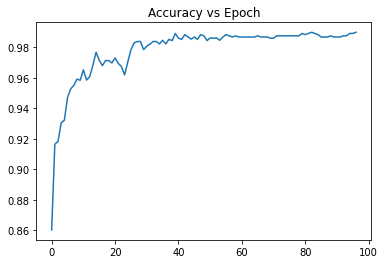

In [ ]:
acc = [x['val_acc'] for x in history]
loss = [x['val_loss'] for x in history]
plt.plot(acc)
plt.title("Accuracy vs Epoch")
plt.show()

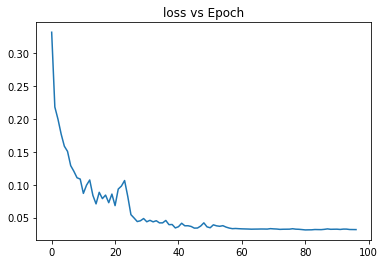

In [ ]:
plt.plot(loss)
plt.title("loss vs Epoch")
plt.show()

In [ ]:
 # Evaluate after training on validation data
result = evaluate(model, val_loader)
result

{'val_acc': 0.9898437261581421, 'val_loss': 0.031839050352573395}

In [ ]:
# Evaluate after training on training data
result = evaluate(model, train_loader)
result

{'val_acc': 0.9951298832893372, 'val_loss': 0.015356208197772503}

In [ ]:

import tensorflow as tf

import numpy as np
from tensorflow.keras.callbacks import Callback
import keras.backend as K
import tensorflow as tf
import gc
import time
import os
import matplotlib
import datetime
import h5py
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score,classification_report,plot_confusion_matrix
from sklearn.model_selection import KFold # kfold cross validation
from sklearn.model_selection import StratifiedKFold, train_test_split
import matplotlib.pyplot as plt
import matplotlib
from glob import glob
import datetime
import gc
import sklearn
import sklearn.preprocessing as preprocessing

import tensorflow.keras as keras 

tf.compat.v1.enable_eager_execution()
K.clear_session()
tf.compat.v1.reset_default_graph()

def main(training: str, validation: str, splits: int = 10):
    g = h5py.File(validation, 'r')
    f = h5py.File(training, 'r')

    enc = preprocessing.OneHotEncoder()

    x_tmp = np.array(g["REALS"])
    y_tmp = np.array(g["REALS_ann"])

    val_dataset_x, val_dataset_y = x_tmp, enc.fit_transform(y_tmp.reshape(-1,1)).toarray()

    x = g['REALS']
    y = g['REALS_ann']

    X, Y = f["X"], f["Y"]

    # split into k folds
    kfold = StratifiedKFold(n_splits=splits, shuffle=True)

    # TRAIN
    counter = 0
    hists = []
    for train_index, test_index in kfold.split(X, Y):
        # model
        model, callbacks = resnet(f"raw_training_{counter}.log", classes=8, init_lr=0.1, tensorboard_dir="logs/")
        # split
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        y_train = enc.transform(y_train).toarray()
        y_test = enc.transform(y_test).toarray()
        # fit
        hist = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), callbacks=callbacks,shuffle=True, batch_size=256, epochs=150)

        counter += 1
        hists.append(hist)

    ## TEST DATA
    model = resnet(f"raw_training_final.log", classes=8, init_lr=0.1, tensorboard_dir="logs/")
    preds = model.predict(val_dataset_x)

    model.save("final_fold_model.hdf5")


    # WITHOUT KFOLD
    """y = enc.transform(np.array(y)).toarray()
    x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(np.array(x),np.array(y),test_size=0.2)
    # save the split
    np.save("raw_x_train.npy", x_train)
    np.save("raw_y_train.npy", y_train)
    np.save("raw_x_test.npy", x_test)
    np.save("raw_y_test.npy", y_test)
    model, callbacks = resnet(f"raw_training.log", classes=9, init_lr=0.1, tensorboard_dir="logs/")
    y_test = enc.transform(y_test).toarray()
    y_train = enc.transform(y_train).toarray()
    hist = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), callbacks=callbacks,shuffle=True, batch_size=256, epochs=150)"""

    

def combine(d: h5py.File, enc: preprocessing.OneHotEncoder = None) -> (np.ndarray, np.ndarray):

    if enc is not None:
        out_X, out_Y = [], []
        dfs = list(d.keys())
        for df in dfs:
            if '_ann' not in df:
                anns = d[df+"_ann"]
                for n,xx in enumerate(d[df]):
                    out_X.append(xx)
                    out_Y.append(enc.transform(anns[n].reshape((-1,1))).toarray())
    else:
        out_X, out_Y = [], []
        dfs = list(d.keys())
        for df in dfs:
            if '_ann' not in df:
                anns = d[df+"_ann"]
                for n,xx in enumerate(d[df]):
                    out_X.append(xx)
                    out_Y.append(anns[n])
    return (np.array(out_X), np.array(out_Y))


def resnet(training_log_path: str, classes: int, init_lr: float, tensorboard_dir: str, n_feature_maps: int=64):
    
    class_names = ["Normal","RBBB","PVC", "FUSION", "APC", "SVPB", "NESC","UNKNOWN", "SVESC"]
    def single_class_accuracy(interesting_class_id):
        # compute the accuracy of a single class
        def fn(y_true, y_pred):
            class_id_true = K.argmax(y_true, axis=-1)
            class_id_preds = K.argmax(y_pred, axis=-1)
            accuracy_mask = K.cast(K.equal(class_id_preds, interesting_class_id), 'int32')
            class_acc_tensor = K.cast(K.equal(class_id_true, class_id_preds), 'int32') * accuracy_mask
            class_acc = K.sum(class_acc_tensor) / K.maximum(K.sum(accuracy_mask), 1)
            return class_acc
        return fn

    class CustomCallback(Callback):
        def __init__(self):
            self.dat = []
            self.seen = 0
            self.epoch = 1
        def on_batch_end(self,batch,logs={}):
            self.dat = logs

        def on_epoch_end(self,batch,logs={}):
            np.save(f"epoch_dat_{self.epoch}.npy", self.dat, allow_pickle=True)
            self.epoch += 1
            gc.collect() # try to clear up some memory??


    METRICS = [
        keras.metrics.BinaryAccuracy(name='accuracy'),
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc')
    ]

    input_layer = keras.layers.Input((339,12),dtype='float32')

    conv_x = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=8, padding='same')(input_layer)
    conv_x = keras.layers.BatchNormalization()(conv_x)
    conv_x = keras.layers.Activation('relu')(conv_x)
    conv_y = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=5, padding='same')(conv_x)
    conv_y = keras.layers.BatchNormalization()(conv_y)
    conv_y = keras.layers.Activation('relu')(conv_y)
    conv_z = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=3, padding='same')(conv_y)
    conv_z = keras.layers.BatchNormalization()(conv_z)
    # expand channels for the sum
    shortcut_y = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=1, padding='same')(input_layer)
    shortcut_y = keras.layers.BatchNormalization()(shortcut_y)
    output_block_1 = keras.layers.add([shortcut_y, conv_z])
    output_block_1 = keras.layers.Activation('relu')(output_block_1)
    conv_x = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_1)
    conv_x = keras.layers.BatchNormalization()(conv_x)
    conv_x = keras.layers.Activation('relu')(conv_x)
    conv_y = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
    conv_y = keras.layers.BatchNormalization()(conv_y)
    conv_y = keras.layers.Activation('relu')(conv_y)
    conv_z = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
    conv_z = keras.layers.BatchNormalization()(conv_z)
    shortcut_y = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=1, padding='same')(output_block_1)
    shortcut_y = keras.layers.BatchNormalization()(shortcut_y)
    output_block_2 = keras.layers.add([shortcut_y, conv_z])
    output_block_2 = keras.layers.Activation('relu')(output_block_2)
    conv_x = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_2)
    conv_x = keras.layers.BatchNormalization()(conv_x)
    conv_x = keras.layers.Activation('relu')(conv_x)
    conv_y = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
    conv_y = keras.layers.BatchNormalization()(conv_y)
    conv_y = keras.layers.Activation('relu')(conv_y)
    conv_z = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
    conv_z = keras.layers.BatchNormalization()(conv_z)
    # no need to expand channels because they are equal
    shortcut_y = keras.layers.BatchNormalization()(output_block_2)
    output_block_3 = keras.layers.add([shortcut_y, conv_z])
    output_block_3 = keras.layers.Activation('relu')(output_block_3)

    gap_layer = keras.layers.GlobalAveragePooling1D()(output_block_3)

    output_layer = keras.layers.Dense(classes, activation='softmax')(gap_layer)
    model = keras.models.Model(inputs=input_layer, outputs=output_layer)
	
    def my_sparse_categorical_crossentropy(y_true, y_pred): # need from logits TRUE override default
        return K.categorical_crossentropy(y_true, y_pred, from_logits=False)

    class spec(tf.keras.metrics.Metric):

        def __init__(self,name, typea,**kwargs):
            super(spec, self).__init__(name=name, **kwargs)
            self.typea = typea

        def update_state(self, y_true, y_pred,sample_weight=None):
            class_id_true = K.argmax(y_true, axis=-1) # one-hot -> int
            class_id_preds = K.argmax(y_pred, axis=-1)
            recall_mask = K.cast(K.equal(class_id_true, self.typea), 'int32')
            class_recall_tensor = K.cast(K.equal(class_id_true, class_id_preds), 'int32') * recall_mask
            self.tmp = K.sum(class_recall_tensor) / K.maximum(K.sum(recall_mask), 1)
            tf.cond(K.cast(K.equal(K.cast(self.tmp, tf.float64), tf.constant(0.0, dtype=tf.float64)),dtype=tf.bool),true_fn=self.if_true, false_fn=self.if_false)

        def result(self):
            return tf.math.subtract(tf.constant(1.0, dtype=tf.float64), self.recall)

        def if_false(self):
            self.recall = self.tmp

    class sens(tf.keras.metrics.Metric):
    # sensitivity metric
        def __init__(self,name, typea,**kwargs):
            super(sens, self).__init__(name=name, **kwargs)
            self.typea = typea

        def update_state(self, y_true, y_pred,sample_weight=None):
            class_id_true = K.argmax(y_true, axis=-1) # one-hot -> int
            class_id_preds = K.argmax(y_pred, axis=-1)
            recall_mask = K.cast(K.equal(class_id_true, self.typea), 'int32')
            class_recall_tensor = K.cast(K.equal(class_id_true, class_id_preds), 'int32') * recall_mask
            self.tmp = K.sum(class_recall_tensor) / K.maximum(K.sum(recall_mask), 1)
            tf.cond(K.cast(K.equal(K.cast(self.tmp, tf.float64), tf.constant(0.0, dtype=tf.float64)),dtype=tf.bool),true_fn=self.if_true, false_fn=self.if_false) # only update recall if not = 0, pesty that it resets if self.typea not in the current batch

        def if_false(self):
            self.recall = self.tmp


    model.compile(loss=my_sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(lr=init_lr),metrics=[m for m in METRICS], weighted_metrics=["accuracy"])

    reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=4, min_lr=0.0000001)

    file_path = f'raw_train_aug_{str(datetime.datetime.now())}.hdf5'
    cc = CustomCallback()

    model_checkpoint = keras.callbacks.ModelCheckpoint(filepath=file_path, monitor='val_loss', save_best_only=True)

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-4)

    csv = tf.keras.callbacks.CSVLogger(training_log_path, separator=",", append=False)

    tensorboard_callback = tf.keras.callbacks.TensorBoard(f"{tensorboard_dir}/model"+str(datetime.datetime.now()), histogram_freq=1, update_freq="batch")

    callbacksa = [reduce_lr, model_checkpoint, callback, cc, csv, tensorboard_callback]

    return (model, callbacksa)

if __name__ == "__main__":
	main("training", "reals")

    